In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Paper
https://arxiv.org/pdf/math-ph/0609050.pdf

### Procedure breakdown

In [2]:
np.random.seed(123456789)

mean = 0
std = 1
N = 12

A, B = np.random.normal(mean, std, size = (N,N)), np.random.normal(mean, std, size = (N,N))
Z = A + 1j*B

In [3]:
Q, R = np.linalg.qr(Z)

In [4]:
Lambda = np.diag([R[i,i]/np.abs(R[i,i]) for i in range(N)])

In [5]:
U = np.matmul(Q, Lambda)
U_dag = np.transpose(np.conjugate(U))

UU_dag = np.matmul(U, U_dag)
U_dagU = np.matmul(U_dag, U)

In [6]:
if np.any(np.abs(UU_dag - np.eye(N)) > 1e-15):
    print('Error')
    
if np.any(np.abs(U_dagU - np.eye(N)) > 1e-15):
    print('Error')

### Function

In [7]:
def haar_unitary(N):

    A, B = np.random.normal(size = (N,N)), np.random.normal(size = (N,N))
    Z = A + 1j*B
    
    Q, R = np.linalg.qr(Z)
    Lambda = np.diag([R[i,i]/np.abs(R[i,i]) for i in range(N)])
    
    U = np.matmul(Q, Lambda)
    U_dag = np.transpose(np.conjugate(U))
    
    return U, U_dag

In [8]:
def wrong_haar_unitary(N):

    A, B = np.random.normal(size = (N,N)), np.random.normal(size = (N,N))
    Z = A + 1j*B
    
    Q, R = np.linalg.qr(Z)
    Lambda = np.diag([R[i,i]/np.abs(R[i,i]) for i in range(N)])
    
    U = Q
    U_dag = np.transpose(np.conjugate(U))
    
    return U, U_dag

In [9]:
def check_unitary(U_, U_dag_):
    
    UU_dag = np.matmul(U_, U_dag_)
    U_dagU = np.matmul(U_dag_, U_)
    
    N_U = np.shape(U_)[0]
    
    if np.any(np.abs(UU_dag - np.eye(N_U)) > 1e-12):
        print('Error')
    
    if np.any(np.abs(U_dagU - np.eye(N_U)) > 1e-12):
        print('Error')

In [10]:
np.random.seed(123456789)

N = 12

U, U_dag = haar_unitary(N)
check_unitary(U, U_dag)

### Test of correctness

Simulate 10000 unitary matrices of dimension N = 50

In [11]:
def wigner_surmise(x):
     return (32/np.pi**2) * x**2 *np.exp(-(4/np.pi)*x**2)
    
def wigner_surmise_fit(x, a, b):
    return a*x**2 * np.exp(b*x**2)

In [12]:
np.random.seed(123456789)

N = 50
spacings_angle_list = []
angle_list = []
eigenvalues_list = []
for uni in range(10000):
    
    Uu, Uu_dag = haar_unitary(N)
    check_unitary(Uu, Uu_dag)
    
    eigenvalues = np.linalg.eigvals(Uu)
    
    angle = np.angle(eigenvalues)
    angle_ordered = np.sort(angle)
    spacings_angle = 1/(2*np.pi) * np.diff(angle_ordered)
    spacings_angle = spacings_angle*N
    
    spacings_angle_list.append(spacings_angle)
    angle_list.append(angle)
    eigenvalues_list.append(eigenvalues)
    
spacings_angle_all = np.array(spacings_angle_list).flatten()

##### Spacings distribution - Wigner surmise

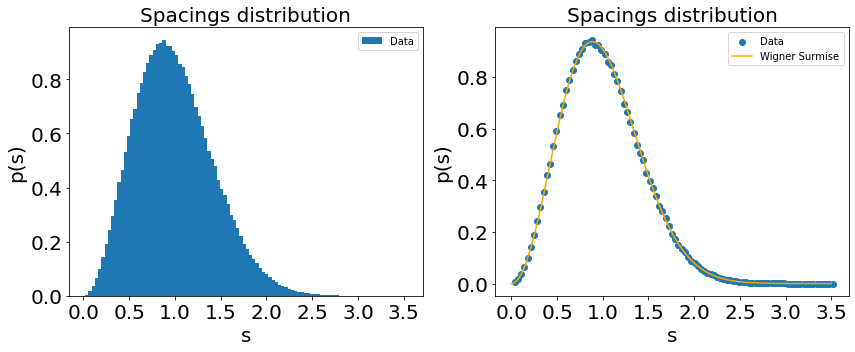

In [13]:
s_array = np.linspace(0, 3.5, 1000)

fig = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
counts, bins_edges, _ = plt.hist(spacings_angle_all, density = True, bins = 100, label = 'Data')
plt.legend()
plt.xlabel('s', fontsize = 20)
plt.ylabel('p(s)', fontsize = 20)
plt.title('Spacings distribution', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.subplot(1,2,2)
bins_centers = (bins_edges[:-1] + bins_edges[1:])/2
plt.scatter(bins_centers, counts, label = 'Data')
plt.plot(s_array, wigner_surmise(s_array), color = 'orange', label = 'Wigner Surmise')
plt.legend()
plt.xlabel('s', fontsize = 20)
plt.ylabel('p(s)', fontsize = 20)
plt.title('Spacings distribution', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.tight_layout()
plt.show()

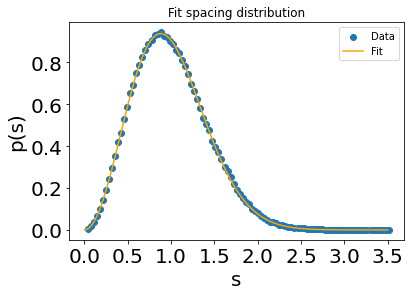

In [14]:
param, cov = curve_fit(wigner_surmise_fit, bins_centers, counts, maxfev = 3000)

plt.scatter(bins_centers, counts, label = 'Data')
plt.plot(s_array, wigner_surmise_fit(s_array, param[0], param[1]), color = 'orange', label = 'Fit')
plt.legend()
plt.xlabel('s', fontsize = 20)
plt.ylabel('p(s)', fontsize = 20)
plt.title('Fit spacing distribution')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [15]:
print('a should be 32/pi^2 = ', 32/np.pi**2)
print('b should be -4/pi = ', -4/np.pi, '\n')

print('Parameters a, k, b: ', param, '\n')

print('Absolute difference a = ', np.abs(param[0] - 32/np.pi**2))
print('Absolute difference b = ', np.abs(param[1] - (-4/np.pi)))

a should be 32/pi^2 =  3.242277876554809
b should be -4/pi =  -1.2732395447351628 

Parameters a, k, b:  [ 3.2834806  -1.28744874] 

Absolute difference a =  0.04120272421813054
Absolute difference b =  0.014209191165671431


##### Eigenvalue density distribution  $\rho(\theta) = \frac{1}{2\pi}$

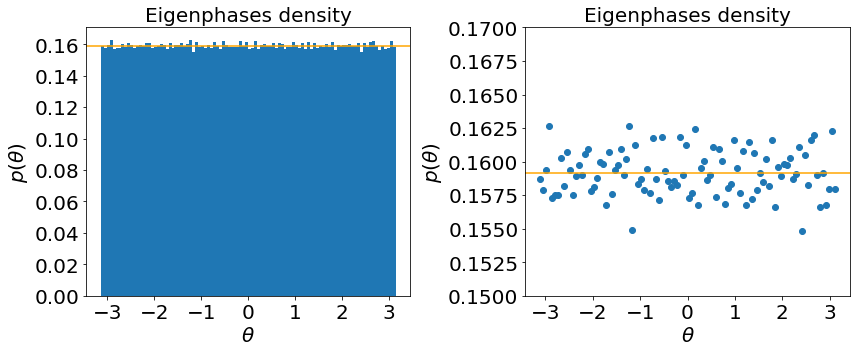

In [16]:
angle_all = np.array(angle_list).flatten()

fig = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
counts, bins_edges, _ = plt.hist(angle_all, density = True, bins = 100)
plt.axhline(1/(2*np.pi), color = 'orange')
plt.xlabel(r'$\theta$', fontsize = 20)
plt.ylabel(r'$p(\theta)$', fontsize = 20)
plt.title('Eigenphases density', fontsize = 20)
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20)

plt.subplot(1,2,2)
plt.scatter((bins_edges[:-1]+bins_edges[1:])/2, counts)
plt.axhline(1/(2*np.pi), color = 'orange')
plt.ylim(0.15, 0.17)
plt.xlabel(r'$\theta$', fontsize = 20)
plt.ylabel(r'$p(\theta)$', fontsize = 20)
plt.title('Eigenphases density', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.tight_layout()
plt.show()

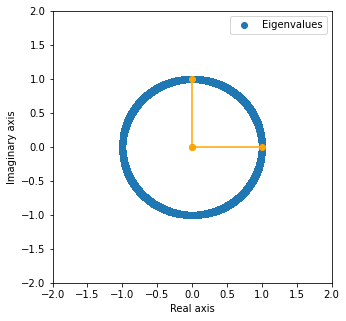

In [17]:
fig = plt.figure(figsize=(5,5))
plt.scatter(np.array(eigenvalues_list).real, np.array(eigenvalues_list).imag, label = 'Eigenvalues')
plt.legend()
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.xlim(-2,2)
plt.ylim(-2,2)
x_start, y_start = 0, 0
x_end, y_end = 0, 1
plt.plot([x_start, x_end], [y_start, y_end], marker='o', color='orange')
plt.plot([x_start, x_end+1], [y_start, y_end-1], marker='o', color='orange')
plt.show()

### Using "Wrong Haar Measure":

In [18]:
np.random.seed(123456789)

N = 50
spacings_angle_list = []
angle_list = []
for uni in range(10000):
    
    Uu, Uu_dag = wrong_haar_unitary(N)
    check_unitary(Uu, Uu_dag)
    
    eigenvalues = np.linalg.eigvals(Uu)
    
    angle = np.angle(eigenvalues)
    angle_ordered = np.sort(angle)
    spacings_angle = 1/(2*np.pi) * np.diff(angle_ordered)
    spacings_angle = spacings_angle*N
    
    spacings_angle_list.append(spacings_angle)
    angle_list.append(angle)
    
spacings_angle_all = np.array(spacings_angle_list).flatten()

##### Spacings distribution - Wigner surmise

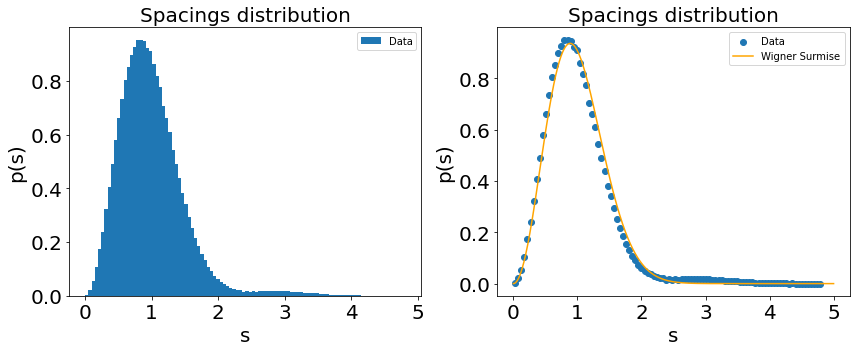

In [19]:
s_array = np.linspace(0, 5, 1000)

fig = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
counts, bins_edges, _ = plt.hist(spacings_angle_all, density = True, bins = 100, label = 'Data')
plt.legend()
plt.xlabel('s', fontsize = 20)
plt.ylabel('p(s)', fontsize = 20)
plt.title('Spacings distribution', fontsize = 20)
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20)

plt.subplot(1,2,2)
bins_centers = (bins_edges[:-1] + bins_edges[1:])/2
plt.scatter(bins_centers, counts, label = 'Data')
plt.plot(s_array, wigner_surmise(s_array), color = 'orange', label = 'Wigner Surmise')
plt.legend()
plt.xlabel('s', fontsize = 20)
plt.ylabel('p(s)', fontsize = 20)
plt.title('Spacings distribution', fontsize = 20)
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20)

plt.tight_layout()
plt.show()

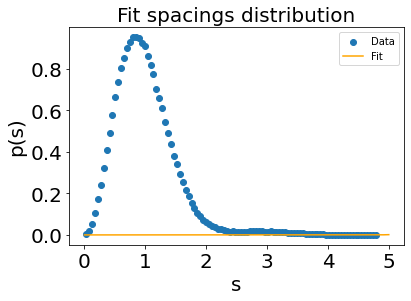

In [20]:
param, cov = curve_fit(wigner_surmise_fit, bins_centers, counts, maxfev = 3000)

plt.scatter(bins_centers, counts, label = 'Data')
plt.plot(s_array, wigner_surmise_fit(s_array, param[0], param[1]), color = 'orange', label = 'Fit')
plt.legend()
plt.xlabel('s', fontsize = 20)
plt.ylabel('p(s)', fontsize = 20)
plt.title('Fit spacings distribution', fontsize = 20)
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20)
plt.show()

In [21]:
print('a should be 32/pi^2 = ', 32/np.pi**2)
print('b should be -4/pi = ', -4/np.pi, '\n')

print('Parameters a, k, b: ', param, '\n')

print('Absolute difference a = ', np.abs(param[0] - 32/np.pi**2))
print('Absolute difference b = ', np.abs(param[1] - (-4/np.pi)))

a should be 32/pi^2 =  3.242277876554809
b should be -4/pi =  -1.2732395447351628 

Parameters a, k, b:  [6.95252816e-16 9.99999867e-01] 

Absolute difference a =  3.242277876554808
Absolute difference b =  2.2732394120097728


##### Eigenvalue density distribution  $\rho(\theta) = \frac{1}{2\pi}$

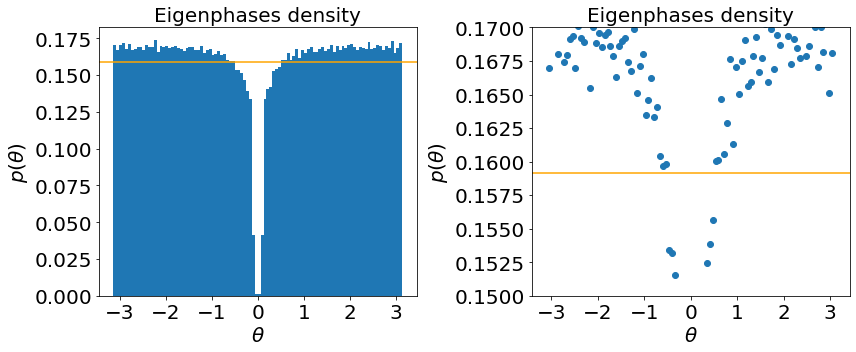

In [22]:
angle_all = np.array(angle_list).flatten()

fig = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
counts, bins_edges, _ = plt.hist(angle_all, density = True, bins = 100)
plt.axhline(1/(2*np.pi), color = 'orange')
plt.xlabel(r'$\theta$', fontsize = 20)
plt.ylabel(r'$p(\theta)$', fontsize = 20)
plt.title('Eigenphases density', fontsize = 20)
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20)

plt.subplot(1,2,2)
plt.scatter((bins_edges[:-1]+bins_edges[1:])/2, counts)
plt.axhline(1/(2*np.pi), color = 'orange')
plt.ylim(0.15, 0.17)
plt.xlabel(r'$\theta$', fontsize = 20)
plt.ylabel(r'$p(\theta)$', fontsize = 20)
plt.title('Eigenphases density', fontsize = 20)
plt.xticks(fontsize = 20)  
plt.yticks(fontsize = 20)

plt.tight_layout()
plt.show()